In [9]:
%matplotlib inline
import pandas as pd

In [10]:

titles=pd.DataFrame.from_csv(r'C:\Users\abhij\Desktop\pycon-pandas-tutorial-master\data\titles.csv',index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gai shi dao wang,1969


In [11]:
cast=pd.DataFrame.from_csv(r'C:\Users\abhij\Desktop\pycon-pandas-tutorial-master\data\cast.csv',index_col=None)
cast.head()


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [12]:
dates=pd.DataFrame.from_csv(r'C:\Users\abhij\Desktop\pycon-pandas-tutorial-master\data\release_dates.csv',index_col=None)
dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


# Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [45]:
c=cast
c=c[(c.character=='Superman')|(c.character=='Batman')]
c=c.groupby(['year','character']).size()

In [49]:
c=c.unstack()
c=c.fillna(0)

In [51]:
d=c.Superman-c.Batman
print("Superman year:")
print (len(d[d>0.0]))

Superman year:
12


# How many years have been "Batman years", with more Batman characters than Superman characters?

In [52]:
c=cast
c=c[(c.character=='Batman') | (c.character=='Superman')]
c=c.groupby(['year','character']).size()

In [54]:
c=c.unstack()

In [56]:
c=c.fillna(0)


In [58]:
d=c.Batman-c.Superman
print("Batman year:")
print (len(d[d>0.0]))

Batman year:
26


# Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [59]:
c=cast
c=c.groupby(['year','type']).size()

In [61]:
c=c.unstack()

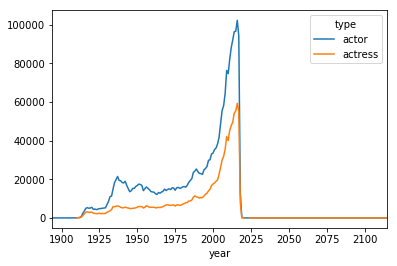

In [64]:
c.plot()

# Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

In [65]:
c=cast
c=c.groupby(['year','type']).size()
c=c.unstack()

In [67]:
c=c.fillna(0)

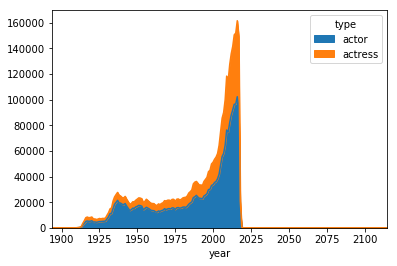

In [68]:
c.plot(kind='area')

# Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [76]:
c=cast
c=c.groupby(['year','type']).size()
c=c.unstack('type')

In [77]:
c=c.fillna(0)

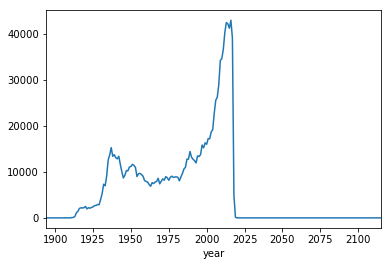

In [78]:
d=c.actor-c.actress
d.plot()

# Plot the fraction of roles that have been 'actor' roles each year in the history of film.


In [127]:
c=cast
c=c.groupby(['year','type']).size()

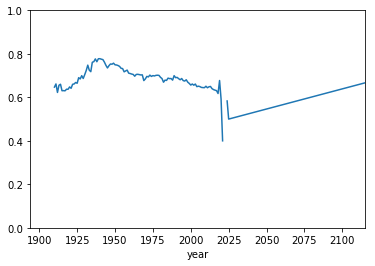

In [137]:
c=c.unstack('type') 
(c.actor/(c.actor+c.actress)).plot(ylim=[0,1])

# Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

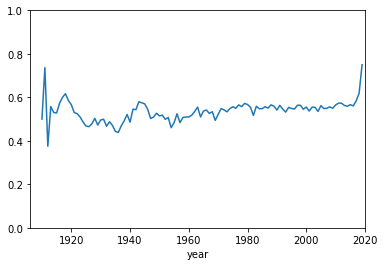

In [154]:
c=cast
c=c[c.n==2]
c=c.groupby(['year','type']).size()
c=c.unstack()
(c.actor/(c.actor+c.actress)).plot(ylim=[0,1])

# Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film. 

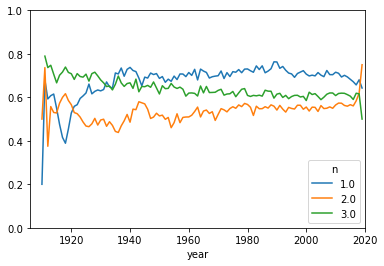

In [168]:
c=cast
c=c[c.n<=3]
c=c.groupby(['year','type','n']).size()
c=c.unstack('type')
r=c.actor/(c.actor+c.actress)
r=r.unstack('n')
r.plot(ylim=[0,1])